In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import files
files.upload()

In [ ]:
!ls -lha kaggle_API.json

-rw-r--r-- 1 root root 66 May 18 18:57 kaggle_API.json


In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle_API.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!pwd

/content


In [ ]:
!kaggle datasets download -d arjuntejaswi/plant-village

Dataset URL: https://www.kaggle.com/datasets/arjuntejaswi/plant-village
License(s): unknown
 96% 315M/329M [00:02<00:00, 168MB/s]
100% 329M/329M [00:02<00:00, 148MB/s]


In [ ]:
!unzip plant-village.zip

Streaming output truncated to the last 5000 lines.
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-7476153023ce___YLCV_GCREC 2258.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Cur

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    seed=42,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 20638 files belonging to 15 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[ 1 10 11 14  6  3 12  8 12 12  7 14 13  0  9 11  9  0 10  5  2 12 10  7
 12  5 14 11  7  5  8 12]


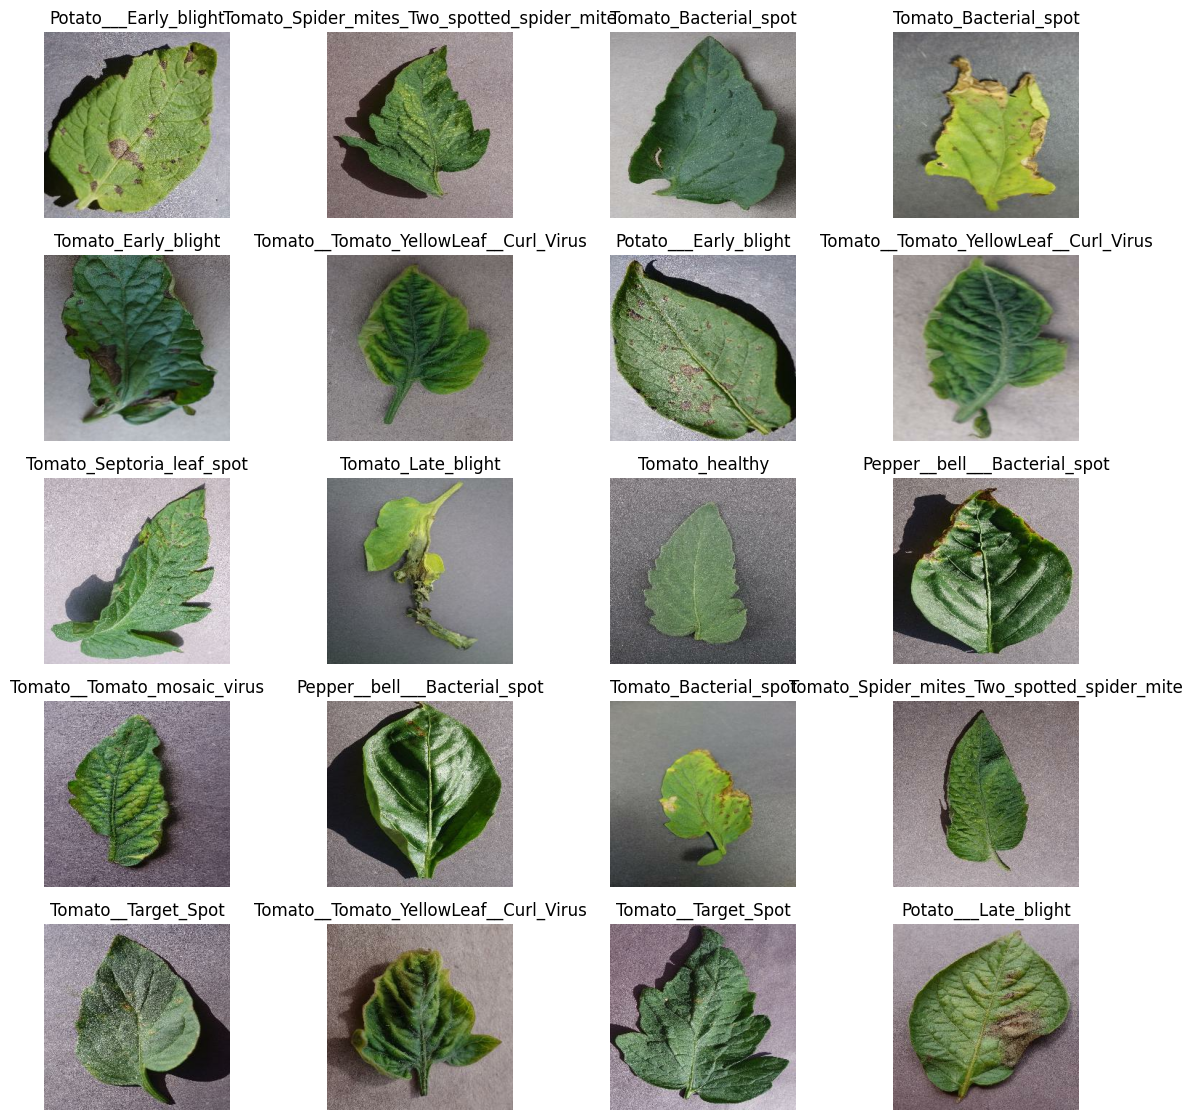

In [ ]:
plt.figure(figsize=(14, 14))
for image_batch, labels_batch in dataset.take(1):
    for i in range(20):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

# **Image Augmentation**

In [ ]:
import os

# Get the list of directories inside the "PlantVillage" directory
directories = os.listdir("PlantVillage")

# Initialize a dictionary to store the number of images for each class
class_counts = {}

# Loop through each directory
for directory in directories:
    # Get the list of files inside the current directory
    files = os.listdir(os.path.join("PlantVillage", directory))

    # Increment the count for the current class
    class_counts[directory] = len(files)

# Print the number of images for each class
for class_name, count in class_counts.items():
    print(f"Class: {class_name}, Count: {count}")


Class: Tomato_healthy, Count: 1591
Class: Potato___Early_blight, Count: 1000
Class: Tomato_Spider_mites_Two_spotted_spider_mite, Count: 1676
Class: Tomato_Early_blight, Count: 1000
Class: Tomato__Tomato_mosaic_virus, Count: 373
Class: Tomato_Septoria_leaf_spot, Count: 1771
Class: Potato___Late_blight, Count: 1000
Class: Tomato__Target_Spot, Count: 1404
Class: Tomato__Tomato_YellowLeaf__Curl_Virus, Count: 3209
Class: Tomato_Leaf_Mold, Count: 952
Class: Pepper__bell___Bacterial_spot, Count: 997
Class: Tomato_Late_blight, Count: 1909
Class: Pepper__bell___healthy, Count: 1478
Class: Tomato_Bacterial_spot, Count: 2127
Class: Potato___healthy, Count: 152


In [ ]:
import imgaug.augmenters as iaa
import numpy as np
import cv2
import os

# Define the augmentation sequence
augmentation_seq = iaa.Sequential([
    iaa.Fliplr(0.5),   # horizontal flips
    iaa.Flipud(0.2),   # vertical flips
    iaa.Affine(
        rotate=(-20, 20),
        scale=(0.8, 1.2),
        shear=(-10, 10),
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}
    ),
    iaa.Multiply((0.8, 1.2)),  # brightness
    iaa.AdditiveGaussianNoise(scale=(0, 0.05*255))  # noise
])

# Load images for a specific class and augment them
def augment_images(class_name, target_count):
    image_dir = f'/content/PlantVillage/{class_name}'
    images = [cv2.imread(os.path.join(image_dir, img)) for img in os.listdir(image_dir)]
    current_count = len(images)

    for i in range(target_count - current_count):
        image = images[i % current_count]  # cycle through the original images
        augmented_image = augmentation_seq(image=image)
        augmented_image_path = os.path.join(image_dir, f'aug_{i}.jpg')
        cv2.imwrite(augmented_image_path, augmented_image)

In [ ]:
class_counts = {
    'Tomato__Target_Spot': 1404,
    'Tomato_Early_blight': 1000,
    'Potato___Early_blight': 1000,
    'Tomato_Late_blight': 1909,
    'Tomato_Bacterial_spot': 2127,
    'Tomato_healthy': 1591,
    'Tomato__Tomato_YellowLeaf__Curl_Virus': 3209,
    'Tomato__Tomato_mosaic_virus': 373,
    'Tomato_Leaf_Mold': 952,
    'Pepper__bell___Bacterial_spot': 997,
    'Potato___healthy': 152,
    'Tomato_Septoria_leaf_spot': 1771,
    'Pepper__bell___healthy': 1478,
    'Tomato_Spider_mites_Two_spotted_spider_mite': 1676,
    'Potato___Late_blight': 1000
}

target_count = 3209

for class_name, count in class_counts.items():
    if count < target_count:
        augment_images(class_name, target_count)

In [ ]:
# Get the list of directories inside the "PlantVillage" directory
directories = os.listdir("PlantVillage")

# Initialize a dictionary to store the number of images for each class
class_counts = {}

# Loop through each directory
for directory in directories:
    # Get the list of files inside the current directory
    files = os.listdir(os.path.join("PlantVillage", directory))

    # Increment the count for the current class
    class_counts[directory] = len(files)

# Print the number of images for each class
for class_name, count in class_counts.items():
    print(f"Class: {class_name}, Count: {count}")

Class: Tomato_healthy, Count: 3209
Class: Potato___Early_blight, Count: 3209
Class: Tomato_Spider_mites_Two_spotted_spider_mite, Count: 3209
Class: Tomato_Early_blight, Count: 3209
Class: Tomato__Tomato_mosaic_virus, Count: 3209
Class: Tomato_Septoria_leaf_spot, Count: 3209
Class: Potato___Late_blight, Count: 3209
Class: Tomato__Target_Spot, Count: 3209
Class: Tomato__Tomato_YellowLeaf__Curl_Virus, Count: 3209
Class: Tomato_Leaf_Mold, Count: 3209
Class: Pepper__bell___Bacterial_spot, Count: 3209
Class: Tomato_Late_blight, Count: 3209
Class: Pepper__bell___healthy, Count: 3209
Class: Tomato_Bacterial_spot, Count: 3209
Class: Potato___healthy, Count: 3209


**Augmented Images Example**

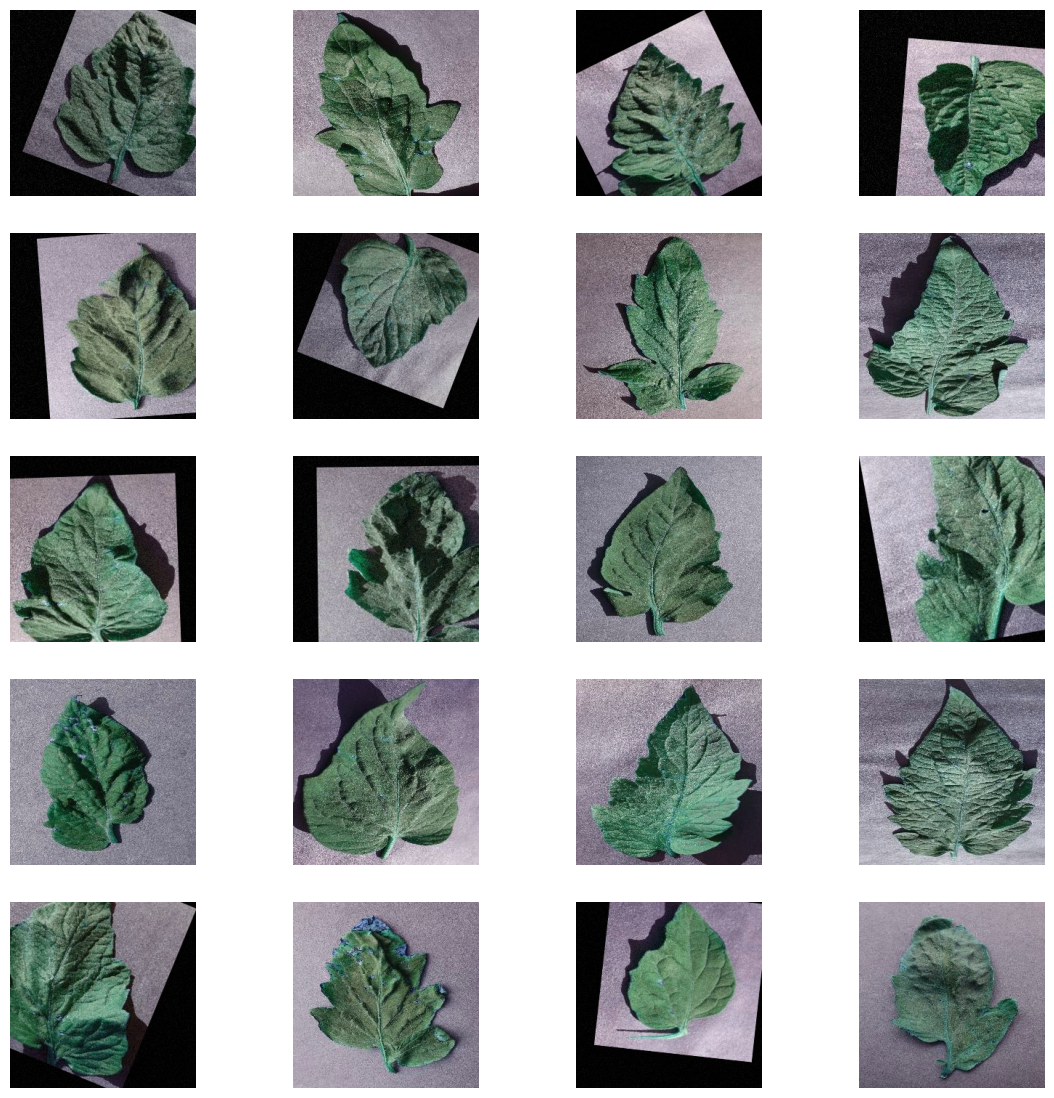

In [ ]:
import matplotlib.pyplot as plt

# Load the augmented images
augmented_images_dir = "PlantVillage/Tomato__Target_Spot"
augmented_images = [cv2.imread(os.path.join(augmented_images_dir, img)) for img in os.listdir(augmented_images_dir)]

# Plot the augmented images
plt.figure(figsize=(14, 14))
for i in range(20):
    ax = plt.subplot(5, 4, i + 1)
    plt.imshow(augmented_images[i])
    plt.axis("off")
plt.show()


# **Data Split**

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
def create_directories(base_dir, classes):
    for split in ['train', 'val', 'test']:
        split_dir = os.path.join(base_dir, split)
        os.makedirs(split_dir, exist_ok=True)
        for cls in classes:
            os.makedirs(os.path.join(split_dir, cls), exist_ok=True)

def split_data(base_dir, classes, split_ratios):
    # Calculate the split ratios
    train_ratio, val_ratio, test_ratio = split_ratios

    for cls in classes:
        class_dir = os.path.join(base_dir, cls)
        images = os.listdir(class_dir)

        # Split the data
        train_and_val, test = train_test_split(images, test_size=test_ratio, random_state=42)
        train, val = train_test_split(train_and_val, test_size=val_ratio / (train_ratio + val_ratio), random_state=42)

        # Move the files to respective directories
        for image in train:
            shutil.move(os.path.join(class_dir, image), os.path.join(base_dir, 'train', cls, image))

        for image in val:
            shutil.move(os.path.join(class_dir, image), os.path.join(base_dir, 'val', cls, image))

        for image in test:
            shutil.move(os.path.join(class_dir, image), os.path.join(base_dir, 'test', cls, image))

def main():
    base_dir = '/content/PlantVillage'
    classes = [
        'Tomato__Target_Spot', 'Tomato_Early_blight', 'Potato___Early_blight',
        'Tomato_Late_blight', 'Tomato_Bacterial_spot', 'Tomato_healthy',
        'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus',
        'Tomato_Leaf_Mold', 'Pepper__bell___Bacterial_spot', 'Potato___healthy',
        'Tomato_Septoria_leaf_spot', 'Pepper__bell___healthy',
        'Tomato_Spider_mites_Two_spotted_spider_mite', 'Potato___Late_blight'
    ]

    # Create directories for train, val, and test splits
    create_directories(base_dir, classes)

    # Split the data
    split_data(base_dir, classes, split_ratios=(0.8, 0.1, 0.1))

if __name__ == "__main__":
    main()

In [ ]:
!zip -r /content/gdrive/MyDrive/PlantVillage.zip /content/PlantVillage

Streaming output truncated to the last 5000 lines.
  adding: content/PlantVillage/train/Potato___healthy/aug_1913.jpg (deflated 0%)
  adding: content/PlantVillage/train/Potato___healthy/aug_33.jpg (deflated 0%)
  adding: content/PlantVillage/train/Potato___healthy/aug_3017.jpg (deflated 0%)
  adding: content/PlantVillage/train/Potato___healthy/aug_2981.jpg (deflated 0%)
  adding: content/PlantVillage/train/Potato___healthy/aug_2729.jpg (deflated 1%)
  adding: content/PlantVillage/train/Potato___healthy/aug_770.jpg (deflated 1%)
  adding: content/PlantVillage/train/Potato___healthy/aug_1600.jpg (deflated 1%)
  adding: content/PlantVillage/train/Potato___healthy/aug_1170.jpg (deflated 0%)
  adding: content/PlantVillage/train/Potato___healthy/aug_1299.jpg (deflated 0%)
  adding: content/PlantVillage/train/Potato___healthy/aug_1178.jpg (deflated 0%)
  adding: content/PlantVillage/train/Potato___healthy/aug_750.jpg (deflated 0%)
  adding: content/PlantVillage/train/Potato___healthy/aug_488.